# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Data Collection and Analysis

In [2]:
df = pd.read_csv(r"C:\Users\dell\Desktop\projects\advertising.csv")


In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
df.shape[0]

200

In [6]:
df.shape[1]

4

In [7]:
df.shape

(200, 4)

In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
len(df.columns)

4

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [13]:
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [14]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [15]:
df.isnull().sum().sum()

0

# Data visualisation

In [16]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

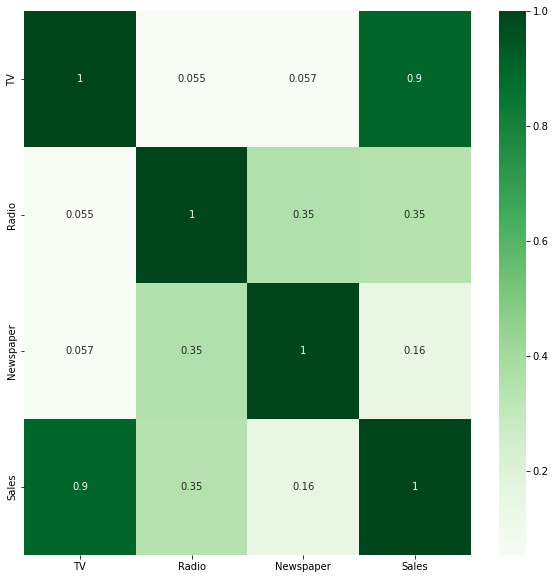

In [17]:
plt.figure(figsize =(10,10))
sns.heatmap(df.corr(), annot= True , cmap='Greens')

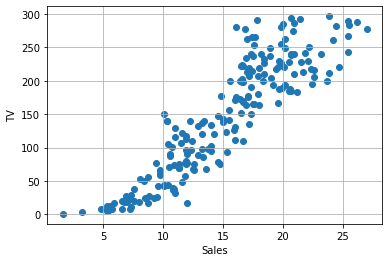

In [18]:
plt.scatter(df.Sales,df.TV)
plt.xlabel('Sales')
plt.ylabel('TV')
plt.grid()

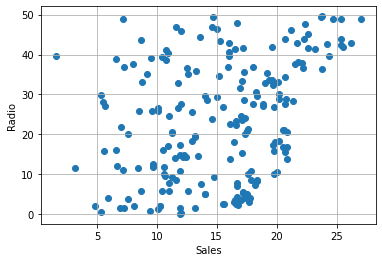

In [19]:
plt.scatter(df.Sales,df.Radio)
plt.xlabel('Sales')
plt.ylabel('Radio')
plt.grid()

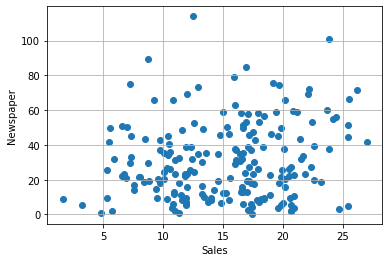

In [20]:
plt.scatter(df.Sales,df.Newspaper)
plt.xlabel('Sales')
plt.ylabel('Newspaper')
plt.grid()

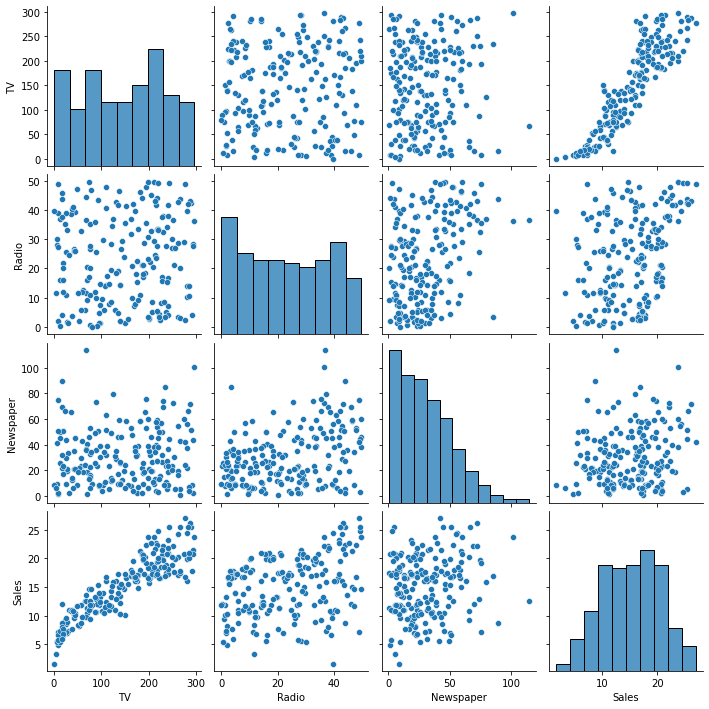

In [21]:
sns.pairplot(df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


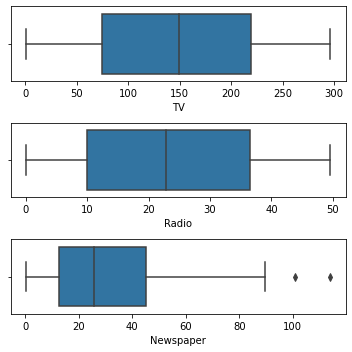

In [22]:
fig, axs = plt.subplots(3,figsize= (5,5))
plt1 = sns.boxplot(df['TV'],ax=axs[0])
plt1 = sns.boxplot(df['Radio'],ax=axs[1])
plt1 = sns.boxplot(df['Newspaper'],ax=axs[2])
plt.tight_layout()

# Separating Data

In [23]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [24]:
#dropping irrelevent features
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [25]:
x.head(5)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [26]:
y.head(5)

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

# Data Splitting

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.2)

In [28]:
len(x_train)

40

In [29]:
len(x_test)

160

In [30]:
len(y_train)

40

In [31]:
len(y_test)

160

# Linear Regression

## Training The Model

In [32]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [33]:
model.coef_

array([0.05619345, 0.12835107, 0.00921681])

In [34]:
model.intercept_

3.68064006584172

## Testing The Model

In [35]:
y_pred= model.predict(x_test)

In [36]:
y_pred


array([24.3465323 , 16.04387663, 12.87878157, 10.81707988,  8.14877426,
        9.01286318,  8.36251009, 22.28571704, 13.05768854, 15.58750201,
       11.33827356, 11.0982193 , 11.13715143,  9.36473784, 18.95049848,
        6.77107741, 22.35376722, 16.73519683, 23.75095134, 17.02953693,
       16.14767689, 13.56401311, 14.64004189, 21.57924294, 17.92899823,
        9.28086802, 15.62488108,  9.61167425, 18.74958909, 23.13076591,
        4.44265778, 15.43720024, 18.07598312, 21.53578297, 13.76187864,
        7.1409315 , 11.97827397, 10.20133045, 14.17288455, 13.95152736,
       16.968951  , 18.9356574 , 11.06323427, 12.20304371,  9.67763932,
       18.21329349, 18.27062972, 24.34873847, 20.74739912, 18.18983605,
       18.20143874, 10.07756063, 12.613958  ,  8.0790934 , 17.50441861,
       20.75750659, 23.32037653, 21.74868893, 26.022739  , 20.41241011,
        8.9672271 ,  7.51857399, 12.00705512, 25.61799998, 25.09047696,
       17.65979263, 20.91962986, 10.10610425, 19.80572998, 10.32

In [37]:
newdf = pd.DataFrame({ 
          "Actual value": y_test,
          "Predicted value" : y_pred,
})

In [38]:
newdf.head(10)

,Actual value,Predicted value
36,25.4,24.346532
171,17.5,16.043877
115,12.6,12.878782
82,11.3,10.817080
170,8.4,8.148774
107,12.0,9.012863
10,12.6,8.362510
54,20.2,22.285717
7,13.2,13.057689
26,15.0,15.587502


## Performance

In [39]:
Linear_r2 = r2_score(y_test,y_pred)
print("R2 score :", Linear_r2) #r2_score



R2 score : 0.8788206036977613


In [40]:
Linear_mse = mean_squared_error(y_test,y_pred)
print("Linear Reg MSE : ",Linear_mse)  #mean_squared_error

Linear Reg MSE :  3.1308059829534747


In [41]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [42]:
model.predict([[52.0,25.8,43.2]])[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


10.31232333750145

# Ridge Regression

In [43]:
from sklearn.linear_model import Ridge


In [44]:
ridge_reg = Ridge()
ridge_reg.fit(x_train , y_train)

Ridge()

In [45]:
y_pred2= ridge_reg.predict(x_test)

In [46]:
ridge_r2 = r2_score(y_test,y_pred2)
print("R2 score :", ridge_r2) #r2_score


R2 score : 0.8788267645018776


In [47]:
ridge_mse = mean_squared_error(y_test,y_pred2)
print("Ridge Reg MSE : ",ridge_mse)  #mean_squared_error

Ridge Reg MSE :  3.1306468116506325


# Lasso Regression

In [48]:
from sklearn.linear_model import Lasso


In [49]:
lasso_reg = Lasso()

In [50]:
lasso_reg.fit(x_train , y_train)

Lasso()

In [51]:
y_pred3= lasso_reg.predict(x_test)

In [52]:
lasso_r2 = r2_score(y_test,y_pred3)
print("R2 score :", lasso_r2) #r2_score

R2 score : 0.8813000565951716


In [53]:
lasso_mse = mean_squared_error(y_test,y_pred3)
print(" Lasso Reg MSE : ", lasso_mse)  #mean_squared_error

 Lasso Reg MSE :  3.066746528932904


#### Visualisation of mse


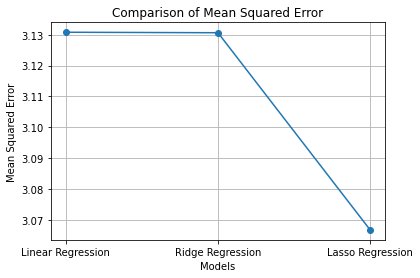

In [54]:

models = ['Linear Regression', 'Ridge Regression' , 'Lasso Regression']
mse_values = [ Linear_mse, ridge_mse, lasso_mse ]

line_plot = plt.plot(models, mse_values, marker='o')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error')
plt.grid(True)
plt.show()

#### Visualisation of r2_score

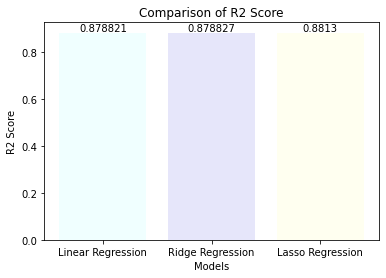

In [55]:

models = ['Linear Regression', 'Ridge Regression' , 'Lasso Regression']
r2_scores = [ Linear_r2, ridge_r2, lasso_r2]
bar = plt.bar(models, r2_scores, color = ['Azure','Lavender','Ivory'])
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Score')
plt.bar_label(bar)
plt.show()